<div style="display:block;width:100%;margin:auto;" direction=rtl align=center><br><br>
    <div  style="width:100%;margin:100;display:block;background-color:#fff0;"  display=block align=center>
        <table style="border-style:hidden;border-collapse:collapse;">
            <tr>
                <td  style="border: none!important;">
        <img width=130 align=right src="https://i.ibb.co/yXKQmtZ/logo1.png" style="margin:0;" />
                </td>
                <td style="text-align:center;border: none!important;">
                <h1 align=center><font size=5 color="#045F5F"> <b>Natural Language Processing (Spring 2023)</b><br><br>CA2-Q1</i></font></h1>
                </td>
                <td style="border: none!important;">
        <img width=170 align=left  src="https://i.ibb.co/wLjqFkw/logo2.png" style="margin:0;" />
                </td>
            </tr>
        </table>
    
</div>
<br>
<font size=3 color="#045F5F">Parham Bicharanlu<br></font><br>
<font size=3 color="#045F5F">810100303<br></font><br>

# Importing Libraries

In [2]:
import numpy as np
import pandas as pd

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.naive_bayes import MultinomialNB
from nltk.tokenize import  word_tokenize 


# EDA

First, we read in the dataset.

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Snappfood - Sentiment Analysis.csv', on_bad_lines='skip' , delimiter='\t')
df

,Unnamed: 0,comment,label,label_id
0,NaN,واقعا حیف وقت که بنویسم سرویس دهیتون شده افتضاح,SAD,1.0
1,NaN,قرار بود ۱ ساعته برسه ولی نیم ساعت زودتر از مو...,HAPPY,0.0
2,NaN,قیمت این مدل اصلا با کیفیتش سازگاری نداره، فقط...,SAD,1.0
3,NaN,عالللی بود همه چه درست و به اندازه و کیفیت خوب...,HAPPY,0.0
4,NaN,شیرینی وانیلی فقط یک مدل بود.,HAPPY,0.0
...,...,...,...,...
69995,NaN,سلام من به فاکتور غذاهایی که سفارش میدم احتیاج...,SAD,1.0
69996,NaN,سایز پیتزا نسبت به سفارشاتی که قبلا گذشتم کم ش...,SAD,1.0
69997,NaN,من قارچ اضافه رو اضافه کرده بودم بودم اما اگر ...,HAPPY,0.0
69998,NaN,همرو بعد ۲ساعت تاخیر اشتباه آوردن پولشم رفت رو...,SAD,1.0


Drop some columns that are not needed for our analysis.

In [5]:
df = df.drop(['Unnamed: 0'],axis = 1)

Next, we identify any rows with missing values and remove them from the dataset. 

In [6]:
df['label_id'].isnull().values.any()


True

In [7]:
df = df.dropna()
df

,comment,label,label_id
0,واقعا حیف وقت که بنویسم سرویس دهیتون شده افتضاح,SAD,1.0
1,قرار بود ۱ ساعته برسه ولی نیم ساعت زودتر از مو...,HAPPY,0.0
2,قیمت این مدل اصلا با کیفیتش سازگاری نداره، فقط...,SAD,1.0
3,عالللی بود همه چه درست و به اندازه و کیفیت خوب...,HAPPY,0.0
4,شیرینی وانیلی فقط یک مدل بود.,HAPPY,0.0
...,...,...,...
69995,سلام من به فاکتور غذاهایی که سفارش میدم احتیاج...,SAD,1.0
69996,سایز پیتزا نسبت به سفارشاتی که قبلا گذشتم کم ش...,SAD,1.0
69997,من قارچ اضافه رو اضافه کرده بودم بودم اما اگر ...,HAPPY,0.0
69998,همرو بعد ۲ساعت تاخیر اشتباه آوردن پولشم رفت رو...,SAD,1.0


In [8]:
df['label_id'] = df['label_id'].astype(int)
df.head()

<ipython-input-8-5c4a2b231cd2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label_id'] = df['label_id'].astype(int)


,comment,label,label_id
0,واقعا حیف وقت که بنویسم سرویس دهیتون شده افتضاح,SAD,1
1,قرار بود ۱ ساعته برسه ولی نیم ساعت زودتر از مو...,HAPPY,0
2,قیمت این مدل اصلا با کیفیتش سازگاری نداره، فقط...,SAD,1
3,عالللی بود همه چه درست و به اندازه و کیفیت خوب...,HAPPY,0
4,شیرینی وانیلی فقط یک مدل بود.,HAPPY,0


In [9]:
df = df.drop(['label'],axis = 1)
df.head()

,comment,label_id
0,واقعا حیف وقت که بنویسم سرویس دهیتون شده افتضاح,1
1,قرار بود ۱ ساعته برسه ولی نیم ساعت زودتر از مو...,0
2,قیمت این مدل اصلا با کیفیتش سازگاری نداره، فقط...,1
3,عالللی بود همه چه درست و به اندازه و کیفیت خوب...,0
4,شیرینی وانیلی فقط یک مدل بود.,0


In [10]:
df.shape

(69480, 2)

We create a bar plot to visualize the distribution of labels in the dataset.

In [11]:
df['label_id'].value_counts()

0    34916
1    34564
Name: label_id, dtype: int64

<Axes: >

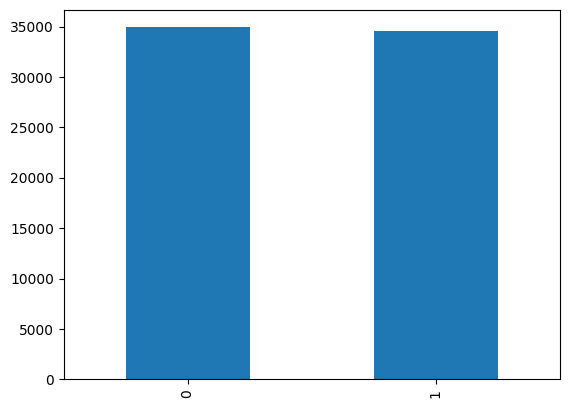

In [12]:
df['label_id'].value_counts().plot(kind='bar')

We randomly sample 20% of the dataset for use in further analysis.

In [13]:
sample_df = df.groupby('label_id').apply(lambda x: x.sample(frac=0.2,random_state=20))
sample_df

comment  label_id
label_id                                                                   
0        32286  مثل همیشه عالی جوجه کباب خوش طمع و برشته بود س...         0
         22081                                بسیار خوشمزه و عالی         0
         62728  ناپلئونی بد نیست اما باقلواشون زیادی عسلی و خش...         0
         9901   سلام خیلی خوشمزه بود بخصوص طعم کنجد رو خیلی دو...         0
         46283  گفته بودم سس مخصوص خودشون و بزارن چرا نزاشته ب...         0
...                                                           ...       ...
1        52332  طعم زردچوبه میداد خیلی زیاد. حالا یا بخاطر مون...         1
         67032          واقعا افتضاح بود به تمام معنا خشک و سوخته         1
         21346  نان سنگک دو رو کنجد زده بودن ولی کنجد رو به نا...         1
         67506  کیفیت پیتزا خیلی پایین بود، طوری که قابل خوردن...         1
         55106  مرغ ابپز و بدون رنگ و طعم بود. با عکسی که گذاش...         1

[13896 rows x 2 columns]

In [14]:
sample_df.shape

(13896, 2)

In [15]:
sample_df['label_id'].value_counts()

0    6983
1    6913
Name: label_id, dtype: int64

In [16]:
sample_df.columns

Index(['comment', 'label_id'], dtype='object')

# Preprocessing and Train/Test Splitting

The Hazm library is a widely used NLP tool in the Persian language that provides functions for cleaning and normalizing Persian text.

In [17]:
pip install hazm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.7/316.7 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 23.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 43.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for nltk: filename=nltk-3.3-py3-none-any.whl size=1394487 sha256=e7e0662b69135e80165dc41eefa7b8d807542dc05262b9a98c8415f74b9e31cf
  Stored in directory: /root/.cache/pip/wheels/ac/62/f6/88933dadcd64a1614894614aa68cf57c4b8e5256acb650b1f1
  Created wheel for libwapiti: filename=libwapiti-0.2.1-cp39-cp39-linux_x86_64.whl size=180386 sha256=b54993323eb73038ff1e4f424e36829cb5248e763108530ba8f1251ffc5b8953
  Stored in directory: /root/.cache/pip/wheels/8e/ff/82/9326b96f96f47472e02c453697b225813e4650c0ed4df2cd49
Successfully built nltk libwapiti
  Attempting unin

In [18]:
sample_df.shape

(13896, 2)

In [19]:
sample_df['comment']

label_id       
0         32286    مثل همیشه عالی جوجه کباب خوش طمع و برشته بود س...
          22081                                  بسیار خوشمزه و عالی
          62728    ناپلئونی بد نیست اما باقلواشون زیادی عسلی و خش...
          9901     سلام خیلی خوشمزه بود بخصوص طعم کنجد رو خیلی دو...
          46283    گفته بودم سس مخصوص خودشون و بزارن چرا نزاشته ب...
                                         ...                        
1         52332    طعم زردچوبه میداد خیلی زیاد. حالا یا بخاطر مون...
          67032            واقعا افتضاح بود به تمام معنا خشک و سوخته
          21346    نان سنگک دو رو کنجد زده بودن ولی کنجد رو به نا...
          67506    کیفیت پیتزا خیلی پایین بود، طوری که قابل خوردن...
          55106    مرغ ابپز و بدون رنگ و طعم بود. با عکسی که گذاش...
Name: comment, Length: 13896, dtype: object

In [20]:
import re
from hazm import Normalizer, word_tokenize

In [21]:
e = ("["
    u"\U0001F600-\U0001F64F"  # emoticons
    u"\U0001F300-\U0001F5FF"  # symbols & pictographs
    u"\U0001F680-\U0001F6FF"  # transport & map symbols
    u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
    u"\U00002500-\U00002BEF"  # chinese char
    u"\U00002702-\U000027B0"
    u"\U00002702-\U000027B0"
    u"\U000024C2-\U0001F251"
    u"\U0001f926-\U0001f937"
    u"\U00010000-\U0010ffff"
    u"\u2640-\u2642" 
    u"\u2600-\u2B55"
    u"\u200d"
    u"\u23cf"
    u"\u23e9"
    u"\u231a"
    u"\ufe0f"  # dingbats
    u"\u3030"
     "]+")

Using hazm to Preproces comments. and after that remove emoticons, symbols, flgs and other unwanted characters.

In [22]:
punctuation = "?.؟!،,"
normalizer = Normalizer()
def preprocessing(item):
    output = normalizer.normalize(item)
    output = output.replace("\_", "\u200c")
#     output = output.replace("\u200c", "")
    output = re.sub(r"LINK([^ ])*|TAG|ID|\-|@|LINK|[A-Za-z]", "", output)
    for i in punctuation:
        p = "\\" + i + "{2,}"
        output = re.sub(p, i, output)
#     output = re.sub("\?|\.|\؟|\!|\،|\,", "", output)
    emoj = re.compile(e)
    for i in emoj.findall(output):
        allemojies.add(i)
    output = re.sub("\s+", " ", output).strip()
    return output

sample_df['comment'] = sample_df['comment'].apply(preprocessing)

In [23]:
sample_df

comment  label_id
label_id                                                                   
0        32286  مثل همیشه عالی جوجه کباب خوش طمع و برشته بود س...         0
         22081                                بسیار خوشمزه و عالی         0
         62728  ناپلئونی بد نیست اما باقلواشون زیادی عسلی و خش...         0
         9901   سلام خیلی خوشمزه بود بخصوص طعم کنجد رو خیلی دو...         0
         46283  گفته بودم سس مخصوص خودشون و بزارن چرا نزاشته ب...         0
...                                                           ...       ...
1        52332  طعم زردچوبه میداد خیلی زیاد. حالا یا بخاطر مون...         1
         67032          واقعا افتضاح بود به تمام معنا خشک و سوخته         1
         21346  نان سنگک دو رو کنجد زده بودن ولی کنجد رو به نا...         1
         67506  کیفیت پیتزا خیلی پایین بود، طوری که قابل خوردن...         1
         55106  مرغ ابپز و بدون رنگ و طعم بود. با عکسی که گذاش...         1

[13896 rows x 2 columns]

In [24]:
sample_df = sample_df.droplevel('label_id')

In [25]:
sample_df = sample_df.reset_index()
sample_df = sample_df.drop(['index'],axis = 1)
sample_df

,comment,label_id
0,مثل همیشه عالی جوجه کباب خوش طمع و برشته بود س...,0
1,بسیار خوشمزه و عالی,0
2,ناپلئونی بد نیست اما باقلواشون زیادی عسلی و خش...,0
3,سلام خیلی خوشمزه بود بخصوص طعم کنجد رو خیلی دو...,0
4,گفته بودم سس مخصوص خودشون و بزارن چرا نزاشته ب...,0
...,...,...
13891,طعم زردچوبه میداد خیلی زیاد. حالا یا بخاطر مون...,1
13892,واقعا افتضاح بود به تمام معنا خشک و سوخته,1
13893,نان سنگک دو رو کنجد زده بودن ولی کنجد رو به نا...,1
13894,کیفیت پیتزا خیلی پایین بود، طوری که قابل خوردن...,1


After cleaning the data, we can split it into training and testing sets with an 80/20 proportion using scikit-learn's train_test_split function.

In [26]:
X= sample_df['comment']
y= sample_df['label_id']

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size= 0.1, random_state= 60)

In [27]:
X_train = X_train.reset_index()
X_train = X_train.drop(['index'],axis = 1)

y_train = y_train.reset_index()
y_train = y_train.drop(['index'],axis = 1)

X_test = X_test.reset_index()
X_test = X_test.drop(['index'],axis = 1)

y_test = y_test.reset_index()
y_test = y_test.drop(['index'],axis = 1)


In [28]:
X_train

,comment
0,کیک دیگری به جای کیک نان آوران ارسال شده است آ...
1,حدود ۲ ساعت تحویل غذا را طول دادند
2,شیرینى شاه پنى به طرز عجیبى کهنه و مونده بود و...
3,این غذا در هر بار سفارش، کم حجم‌تر و کم‌ محتوا...
4,اگر غذا خوشرنگ‌تر میبود مثل عکس سفارش و اینکه ...
...,...
12501,غذا خیلی سریعتر از همیشه ارسال شد. کیفیتش خوب ...
12502,خوب بود ولی سسش خیلی زیاد بود
12503,کاشکی حداقل یک تکشو بدون استخون میذاشتید! دوتا...
12504,سالاد ارسالی کاملا بی کیفیت و مونده بود و اب ا...


In [29]:
y_train

,label_id
0,1
1,1
2,1
3,1
4,1
...,...
12501,0
12502,0
12503,1
12504,0


# Implementing the TF-IDF Algorithm

TF-IDF (Term Frequency-Inverse Document Frequency) is a widely used algorithm in text data analysis for calculating the importance of words in a document. 

In [31]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

Tokenizing and Indexing Text Data Using NLTK Library.

In [32]:
sentences = []
word_set = []
 
for index, sent in X_train.iterrows():
    x = [i.lower() for  i in word_tokenize(sent['comment']) if i.isalpha()]
    sentences.append(x)
    for word in x:
        if word not in word_set:
            word_set.append(word)
#Set of vocab 
word_set = set(word_set)
#Total documents in our corpus
total_documents = len(sentences)
 
#Creating an index for each word in our vocab.
index_dict = {} #Dictionary to store index for each word
i = 0
for word in word_set:
    index_dict[word] = i
    i += 1
print(index_dict)

{'برگراتورو': 0, 'درصدی': 1, 'زمینی': 2, 'دداشت': 3, 'نیوا': 4, 'زمانی': 5, 'قالب': 6, 'کیفیتم': 7, 'وبادمجان': 8, 'جالبی': 9, 'اینترنت': 10, 'پپروک': 11, 'کس': 12, 'تبریز': 13, 'چاپدار': 14, 'نهم': 15, 'کیفتیتش': 16, 'مطبوع': 17, 'حالتی': 18, 'کدوهاش': 19, 'مبلغشو': 20, 'عددشون': 21, 'یونانی': 22, 'عالیییییی': 23, 'تخفیفها': 24, 'خریدم': 25, 'صدا': 26, 'بازیه': 27, 'یسریها': 28, 'ترسناکیه': 29, 'وایساد': 30, 'قوت': 31, 'اسون': 32, 'همتا': 33, 'چرخ': 34, 'کبابترکی': 35, 'ساطوری': 36, 'پیازهایی': 37, 'دان': 38, 'خودش': 39, 'شاد': 40, 'مهمون': 41, 'چورک': 42, 'پیاز': 43, 'منشی': 44, 'برنجاش': 45, 'طلا': 46, 'اسنپن': 47, 'دولت': 48, 'نیاره': 49, 'میمونم': 50, 'تقرییا': 51, 'بخرید': 52, 'ریزه': 53, 'غذاهاش': 54, 'وآ': 55, 'بیم': 56, 'باااورم': 57, 'ببرین': 58, 'خلالی': 59, 'دیزاین': 60, 'روی': 61, 'مرسى': 62, 'بورک': 63, 'چیلیش': 64, 'اینهم': 65, 'سفار': 66, 'فک': 67, 'اهمیت': 68, 'چسیده': 69, 'گرمش': 70, 'بدستمون': 71, 'بولکی': 72, 'نظرم': 73, 'چقد': 74, 'مانستر': 75, 'دیرررررررررررر': 76

Counting Word Occurrences in comments.

In [33]:
#Create a count dictionary
 
def count_dict(sentences):
    word_count = {}
    for word in word_set:
        word_count[word] = 0
        for sent in sentences:
            if word in sent:
                word_count[word] += 1
    return word_count
 
word_count = count_dict(sentences)

In [34]:
sorted(word_count.items(), key=lambda item: item[1], reverse=True)

[('بود', 6752),
 ('و', 6426),
 ('به', 3296),
 ('از', 2974),
 ('که', 2859),
 ('خیلی', 2753),
 ('هم', 2372),
 ('کیفیت', 2265),
 ('خوب', 2202),
 ('غذا', 2180),
 ('با', 2086),
 ('عالی', 1956),
 ('سفارش', 1722),
 ('ولی', 1707),
 ('در', 1571),
 ('این', 1442),
 ('نبود', 1435),
 ('من', 1388),
 ('بسیار', 1346),
 ('رو', 1339),
 ('رسید', 1250),
 ('واقعا', 1116),
 ('اصلا', 1083),
 ('سرد', 1067),
 ('پیتزا', 1057),
 ('فقط', 1024),
 ('خوشمزه', 997),
 ('ارسال', 889),
 ('طعم', 872),
 ('تازه', 831),
 ('همیشه', 813),
 ('ممنون', 807),
 ('یک', 790),
 ('کم', 785),
 ('پیک', 774),
 ('بد', 768),
 ('شده', 754),
 ('اما', 752),
 ('برای', 736),
 ('داشت', 712),
 ('کاملا', 689),
 ('مثل', 686),
 ('تا', 685),
 ('مرغ', 680),
 ('همه', 659),
 ('یه', 655),
 ('سیب', 654),
 ('تحویل', 646),
 ('بسته', 630),
 ('نداشت', 619),
 ('بودن', 614),
 ('مزه', 608),
 ('گرم', 599),
 ('بی', 584),
 ('قیمت', 579),
 ('سس', 557),
 ('نسبت', 548),
 ('متاسفانه', 543),
 ('اینکه', 536),
 ('دادم', 532),
 ('حجم', 514),
 ('بندی', 505),
 ('نان', 483),


Implementing the Term Frequency (TF) Algorithm.

In [35]:
#Term Frequency
def termfreq(document, word):
    N = len(document)
    occurance = len([token for token in document if token == word])
    #return 1 + np.log(occurance)
    return occurance/N

 Implementing the Inverse Document Frequency (IDF) Algorithm.

In [36]:
#Inverse Document Frequency
 
def inverse_doc_freq(word):
    try:
        word_occurance = word_count[word] + 1
    except:
        word_occurance = 1
    return np.log(total_documents/word_occurance)

Implementing the TF-IDF Algorithm.

In [37]:
def tf_idf(sentence):
    tf_idf_vec = np.zeros((len(word_set),))
    for word in sentence:
        tf = termfreq(sentence,word)
        #print('tf: ',tf)
        idf = inverse_doc_freq(word)
        #print('idf: ',idf)
        value = tf*idf
        try:
          tf_idf_vec[index_dict[word]] = value 
        except:
          continue
    return tf_idf_vec

Generating TF-IDF Vectors for each comment in the training set.

In [38]:
tfidf_vectors_train = []
for sent in sentences:
    vec = tf_idf(sent)
    tfidf_vectors_train.append(vec)

In [39]:
tfidf_vectors_train[0][140]

0.0

Tokenizes the comments in the test set.

In [40]:
sentences_test = []
 
for index, sent in X_test.iterrows():
    x = [i.lower() for  i in word_tokenize(sent['comment']) if i.isalpha()]
    sentences_test.append(x)

In [41]:
sentences_test[:3]

[['کیفیت', 'غذا', 'خوب', 'و', 'بسته', 'بندی', 'عالی', 'بود'],
 ['سریع',
  'و',
  'به',
  'موقع',
  'رسید',
  'جوجه',
  'ترش',
  'خوب',
  'و',
  'خوشمزه',
  'بود'],
 ['طعم',
  'خاهمه',
  'خوب',
  'نبود',
  'و',
  'برخلاف',
  'نام',
  'شیرینی',
  'اصلا',
  'اسفنجی',
  'نبود',
  'تازه',
  'هم',
  'نبود']]

Generating TF-IDF Vectors for each comment in the test set.

In [42]:
tfidf_vectors_test = []
for sent in sentences_test:
    #print('sent: ',sent)
    vec = tf_idf(sent)
    #print('vec: ',vec,'sent: ',sent)
    tfidf_vectors_test.append(vec)

Train a Naive Bayes classifier on the TF-IDF vectors of the training set.

In [43]:
#naive bayes classifier
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(tfidf_vectors_train, y_train['label_id'])

MultinomialNB()

Making Predictions on Test Data.

In [44]:
y_pred = naive_bayes_classifier.predict(tfidf_vectors_test)

In [45]:
y_pred.shape

(1390,)

Evaluating the Performance of a Naive Bayes Classifier on Test Data using TF-IDF.

In [46]:
print(classification_report(y_test['label_id'],y_pred))

              precision    recall  f1-score   support

           0       0.87      0.76      0.81       737
           1       0.76      0.88      0.82       653

    accuracy                           0.81      1390
   macro avg       0.82      0.82      0.81      1390
weighted avg       0.82      0.81      0.81      1390



Sample Predictions on Test Data.

In [156]:
import random
random.seed(30)
for i in range(10):  
  random_number = random.randint(0, y_test.shape[0])
  print('sentence: ',sentences_test[random_number])
  print('real label: ',y_test['label_id'][random_number])
  print('predict_label: ',y_pred[random_number])
  print('---***---')

sentence:  ['سوسیس', 'استفاده', 'شده', 'اصلا', 'خوب', 'نبود']
real label:  1
predict_label:  1
---***---
sentence:  ['من', 'دفعه', 'اولی', 'نیست', 'که', 'ازاین', 'رستوران', 'غذا', 'میگیرم', 'ولی', 'مطمئنا', 'آخرین', 'بارم', 'بود']
real label:  1
predict_label:  1
---***---
sentence:  ['شیرینی', 'خیلی', 'و', 'اصلا', 'طعم', 'خوبی', 'نداشت', 'پر', 'شیره', 'بود']
real label:  1
predict_label:  1
---***---
sentence:  ['بار', 'اولی', 'بود', 'که', 'سفارش', 'میدادم', 'از', 'این', 'رستوران', 'لازانیا', 'خیلی', 'خیلی', 'معمولی', 'بود', 'گوشت', 'بو', 'میداد', 'غذا', 'فوق', 'العاده', 'چرب', 'بود', 'تا', 'حدی', 'که', 'وقتی', 'سرد', 'شد', 'دیگه', 'نمیشد', 'خوردش', 'کلا', 'کیفت', 'غذا', 'بد', 'نبود', 'ولی', 'اونقدرم', 'خوب', 'نبود', 'که', 'مجدد', 'به', 'این', 'رستوران', 'سفارش', 'غذا', 'بدم', 'حتی', 'تو', 'تخفیف', 'درصد']
real label:  1
predict_label:  1
---***---
sentence:  ['با', 'یکساعت', 'و', 'دقیقه', 'تاخیر', 'جنس', 'تحویل', 'شد']
real label:  0
predict_label:  1
---***---
sentence:  ['با', 'وجو

# PPMI
Pointwise Mutual Information (PMI) is a feature scoring metrics that estimate the association between a feature and a class.

In [47]:
n_labels= y_train['label_id'].value_counts()
n_labels

1    6260
0    6246
Name: label_id, dtype: int64

Count the number of comments that belong to a specific label category. 

In [48]:
n_sad_comments = n_labels[1]
n_sad_comments

6260

In [49]:
n_happy_comments = n_labels[0]
n_happy_comments

6246

In [50]:
n = y_train.shape[0]
n

12506

Calculates the probabilities of a comment belonging to each label category.

In [51]:
p_sad = n_sad_comments / n
p_sad

0.5005597313289621

In [52]:
p_happy = n_happy_comments / n
p_happy

0.4994402686710379

Calculates the document frequency (DF) of a specific word in a corpus.

In [53]:
def doc_freq(word):
  return  word_count[word] / n

In [54]:
merged_train = pd.concat([X_train, y_train], axis = 1)
merged_train

,comment,label_id
0,کیک دیگری به جای کیک نان آوران ارسال شده است آ...,1
1,حدود ۲ ساعت تحویل غذا را طول دادند,1
2,شیرینى شاه پنى به طرز عجیبى کهنه و مونده بود و...,1
3,این غذا در هر بار سفارش، کم حجم‌تر و کم‌ محتوا...,1
4,اگر غذا خوشرنگ‌تر میبود مثل عکس سفارش و اینکه ...,1
...,...,...
12501,غذا خیلی سریعتر از همیشه ارسال شد. کیفیتش خوب ...,0
12502,خوب بود ولی سسش خیلی زیاد بود,0
12503,کاشکی حداقل یک تکشو بدون استخون میذاشتید! دوتا...,1
12504,سالاد ارسالی کاملا بی کیفیت و مونده بود و اب ا...,0


Tokenizing Text Data Using NLTK Library.

In [55]:
sentences_happy = []
sentences_sad = []

for index, sent in merged_train.iterrows():
    if sent['label_id'] == 1:
      x_sad = [i.lower() for  i in word_tokenize(sent['comment']) if i.isalpha()]
      sentences_sad.append(x_sad)
    elif sent['label_id'] == 0:
      x_happy = [i.lower() for  i in word_tokenize(sent['comment']) if i.isalpha()]
      sentences_happy.append(x_happy)


In [56]:
count_happy_words = count_dict(sentences_happy)
sorted(count_happy_words.items(), key=lambda item: item[1], reverse=True)

[('بود', 3529),
 ('و', 3109),
 ('عالی', 1828),
 ('خوب', 1588),
 ('خیلی', 1566),
 ('به', 1521),
 ('از', 1348),
 ('هم', 1136),
 ('که', 1072),
 ('کیفیت', 1041),
 ('ولی', 952),
 ('غذا', 916),
 ('با', 913),
 ('خوشمزه', 899),
 ('رسید', 796),
 ('ممنون', 751),
 ('در', 669),
 ('فقط', 652),
 ('بسیار', 618),
 ('همیشه', 606),
 ('سفارش', 567),
 ('تازه', 557),
 ('من', 529),
 ('رو', 527),
 ('این', 507),
 ('طعم', 481),
 ('مثل', 479),
 ('واقعا', 458),
 ('همه', 456),
 ('سریع', 429),
 ('گرم', 426),
 ('ارسال', 416),
 ('پیک', 415),
 ('نبود', 413),
 ('پیتزا', 403),
 ('اما', 392),
 ('موقع', 368),
 ('کم', 355),
 ('بسته', 307),
 ('داشت', 295),
 ('یه', 290),
 ('بندی', 278),
 ('سرد', 265),
 ('برای', 265),
 ('ممنونم', 257),
 ('راضی', 256),
 ('بودن', 255),
 ('سیب', 254),
 ('یک', 252),
 ('قیمت', 245),
 ('سس', 244),
 ('شده', 243),
 ('اسنپ', 240),
 ('حجم', 239),
 ('تا', 235),
 ('نسبت', 233),
 ('باشه', 225),
 ('تشکر', 222),
 ('سلام', 220),
 ('داغ', 220),
 ('خوش', 219),
 ('اینکه', 219),
 ('تحویل', 216),
 ('دستم', 213),

In [57]:
count_sad_words = count_dict(sentences_sad)
sorted(count_sad_words.items(), key=lambda item: item[1], reverse=True)

[('و', 3317),
 ('بود', 3223),
 ('که', 1787),
 ('به', 1775),
 ('از', 1626),
 ('غذا', 1264),
 ('هم', 1236),
 ('کیفیت', 1224),
 ('خیلی', 1187),
 ('با', 1173),
 ('سفارش', 1155),
 ('نبود', 1022),
 ('این', 935),
 ('اصلا', 915),
 ('در', 902),
 ('من', 859),
 ('رو', 812),
 ('سرد', 802),
 ('ولی', 755),
 ('بسیار', 728),
 ('واقعا', 658),
 ('بد', 655),
 ('پیتزا', 654),
 ('خوب', 614),
 ('یک', 538),
 ('شده', 511),
 ('کاملا', 507),
 ('مرغ', 484),
 ('ارسال', 473),
 ('برای', 471),
 ('نداشت', 460),
 ('رسید', 454),
 ('تا', 450),
 ('بی', 446),
 ('کم', 430),
 ('تحویل', 430),
 ('داشت', 417),
 ('متاسفانه', 401),
 ('سیب', 400),
 ('مزه', 399),
 ('طعم', 391),
 ('دادم', 386),
 ('پایین', 374),
 ('فقط', 372),
 ('یه', 365),
 ('دیگه', 362),
 ('اما', 360),
 ('بودن', 359),
 ('پیک', 359),
 ('قیمت', 334),
 ('مونده', 330),
 ('ساعت', 328),
 ('بسته', 323),
 ('اینکه', 317),
 ('نسبت', 315),
 ('سس', 313),
 ('رستوران', 307),
 ('نان', 306),
 ('زمینی', 290),
 ('شد', 290),
 ('بعد', 283),
 ('تو', 282),
 ('حجم', 275),
 ('تازه', 274)

Calculate the probability of a specific word occurring in the "happy" and "sad" label categories.

In [63]:
def happy_word(word):
  return count_happy_words[word] / n

In [64]:
def sad_word(word):
  return count_sad_words[word] / n

Calculates the PPMI score of a specific word in both the "happy" and "sad" label categories.

In [123]:
def calculate_PPMI(word):
    
  p_word = doc_freq(word)
  p_happy_word = happy_word(word)
  p_sad_word = sad_word(word)

  happy_PMI = p_happy_word / (p_word * p_happy)
  sad_PMI   = p_sad_word / (p_word * p_sad)
      
  happy_PPMI = 0
  sad_PPMI = 0
  if happy_PMI > 0:
    happy_PPMI = happy_PMI
  if sad_PMI > 0:
    sad_PPMI = sad_PMI
  
  return happy_PPMI, sad_PPMI

Calculates the PPMI vectors for a given sentence. 

In [119]:
def PPMI(sentence):
    PPMI_vector_sad = np.zeros((len(word_set),))
    PPMI_vector_happy = np.zeros((len(word_set),))
    for word in sentence: 
        try:
          h, s = calculate_PPMI(word)
          PPMI_vector_sad[index_dict[word]] = s
          PPMI_vector_happy[index_dict[word]] = h
        except:
          continue
    return PPMI_vector_sad, PPMI_vector_happy

Generating PPMI Vectors for each comment in the training set.

In [91]:
PPMI_vector = []
for sent in sentences:
    vec_sad, vec_happy = PPMI(sent)
    PPMI_vector.append([vec_sad,vec_happy])

In [72]:
sentences[0]

['کیک',
 'دیگری',
 'به',
 'جای',
 'کیک',
 'نان',
 'آوران',
 'ارسال',
 'آدامس',
 'ثبت',
 'شده',
 'در',
 'سفارش',
 'ارسال',
 'ممنون',
 'میشم',
 'سریعتر',
 'پیگیری',
 'شود']

In [95]:
index_dict['ممنون']

495

In [98]:
print('sad-PPMI: ',PPMI_vector[0][0][495], '\nhappy-PPMI: ', PPMI_vector[0][1][495])

sad-PPMI:  0.13863043418015683 
happy-PPMI:  1.8633002692975054


In [99]:
sentences[10]

['برای', 'که', 'اماده', 'و', 'در', 'یخچال', 'هست', 'دیر', 'رسید']

In [100]:
index_dict['دیر']

5095

In [102]:
print('sad-PPMI: ',PPMI_vector[10][0][5095], '\nhappy-PPMI: ', PPMI_vector[10][1][5095])

sad-PPMI:  1.169259619391582 
happy-PPMI:  0.8303609962549944


Reshapes the PPMI vectors of trainig data.

In [111]:
features_train = np.array(PPMI_vector)
features_train.shape

(12506, 2, 10912)

In [110]:
feature_vector = features_train.reshape(features_train.shape[0],features_train.shape[1]*features_train.shape[2])
feature_vector.shape

(12506, 21824)

Generating PPMI Vectors for each comment in the test set.

In [124]:
PPMI_vector_test = []
for sent in sentences_test:
    vec_sad, vec_happy = PPMI(sent)
    PPMI_vector_test.append([vec_sad,vec_happy])

Reshapes the PPMI vectors of test data.

In [129]:
features_test = np.array(PPMI_vector_test)
feature_vector_test = features_test.reshape(features_test.shape[0],features_test.shape[1]*features_test.shape[2])
feature_vector_test.shape

(1390, 21824)

Train a Naive Bayes classifier on the PPMI vectors of the training set.

In [112]:
#naive bayes classifier
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(feature_vector, y_train['label_id'])

MultinomialNB()

Making Predictions on Test Data.

In [130]:
y_pred_PPMI = naive_bayes_classifier.predict(feature_vector_test)

In [131]:
y_pred_PPMI.shape

(1390,)

Evaluating the Performance of a Naive Bayes Classifier on Test Data using PPMI.

In [132]:
print(classification_report(y_test['label_id'],y_pred_PPMI))

              precision    recall  f1-score   support

           0       0.87      0.80      0.83       737
           1       0.79      0.87      0.83       653

    accuracy                           0.83      1390
   macro avg       0.83      0.83      0.83      1390
weighted avg       0.83      0.83      0.83      1390



Sample Predictions on Test Data.

In [155]:
import random
random.seed(20)
for i in range(10):  
  random_number = random.randint(0, y_test.shape[0])
  print('sentence: ',sentences_test[random_number])
  print('real label: ',y_test['label_id'][random_number])
  print('predict_label: ',y_pred_PPMI[random_number])
  print('---***---')

sentence:  ['با', 'اینکه', 'تاکید', 'کردم', 'شیرینیا', 'تازه', 'باشه', 'ولی', 'کاملا', 'کهنه', 'و', 'مونده', 'بود', 'تو', 'توضیحات', 'گرم', 'ولی', 'کیلو', 'بود', 'شیرینی', 'و', 'جعبه', 'جاهاییش', 'خالی', 'بود', 'اسنپ', 'هم', 'معلوم', 'نیس', 'چجوری', 'که', 'چپه', 'و', 'و', 'تزئیناتش', 'مالیده', 'ب', 'جعبه', 'من', 'برای', 'مهمونی', 'میخاستم', 'ببرم', 'شیرینی', 'رو', 'تومن', 'پول', 'دادم', 'ولی', 'مجبور', 'شدم', 'دوباره', 'بخرم', 'اصلا', 'راضی', 'نبودم', 'اصلا']
real label:  1
predict_label:  1
---***---
sentence:  ['کروسان', 'و', 'دستکشی', 'که', 'سفارش', 'هر', 'دو', 'رو', 'از', 'برند', 'آوردن', 'که', 'من', 'دوست', 'نداشتم']
real label:  0
predict_label:  1
---***---
sentence:  ['اگر', 'قرار', 'است', 'قسمت', 'توضیحات', 'سفارش', 'همیشه', 'نادیده', 'پس', 'کاربردش', 'و', 'وجودش', 'برای', 'چیه', 'من', 'هربار', 'سفارش', 'از', 'مختلف', 'در', 'این', 'قسمت', 'تاکید', 'که', 'نوشابه', 'اسپرایت', 'یا', 'زرد', 'باشد', 'اما', 'همیشهههههه', 'مشکی', 'کوکا', 'کولا', 'یا', 'پپسی', 'و', 'همیشه', 'باز', 'نک